In [6]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import easy21

No. of episodes: 20000


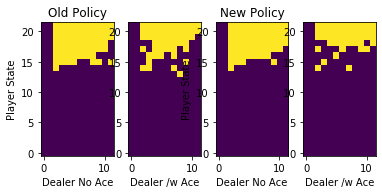

No. of episodes: 40000


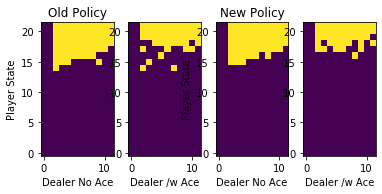

No. of episodes: 80000


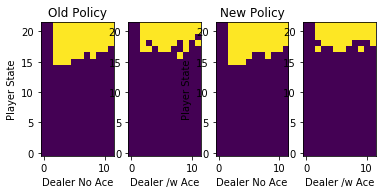

No. of episodes: 160000


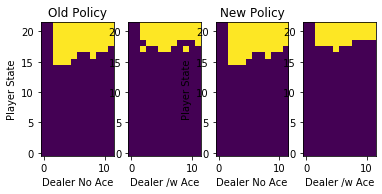

No. of episodes: 320000


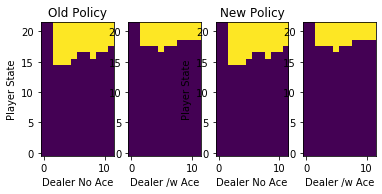

In [7]:
%matplotlib inline

env = easy21.BlackjackEnv()
agent = easy21.SarsaAgent(env, gamma=1.0, N0=100)

K = 10000
Q = agent.learn(K)
A_ = np.argmax(Q, axis=3)
A = np.ones_like(A_)
while (not np.array_equal(A_, A) and K < 640000):
    A = A_
    K *= 2
    print('No. of episodes: {:}'.format(K))
    Q = agent.learn(K)
    A_ = np.argmax(Q, axis=3)

    plt.subplot(1,4,1)
    plt.title('Old Policy')
    plt.imshow(A[:,:,0], cmap='viridis')
    plt.xlabel('Dealer No Ace')
    plt.ylabel('Player State')
    plt.gca().invert_yaxis()
    plt.subplot(1,4,2)
    plt.imshow(A[:,:,1], cmap='viridis')
    plt.xlabel('Dealer /w Ace')
    plt.gca().invert_yaxis()
    plt.subplot(1,4,3)
    plt.title('New Policy')
    plt.imshow(A_[:,:,0], cmap='viridis')
    plt.xlabel('Dealer No Ace')
    plt.ylabel('Player State')
    plt.gca().invert_yaxis()
    plt.subplot(1,4,4)
    plt.imshow(A_[:,:,1], cmap='viridis')
    plt.xlabel('Dealer /w Ace')
    plt.gca().invert_yaxis()
    plt.show()


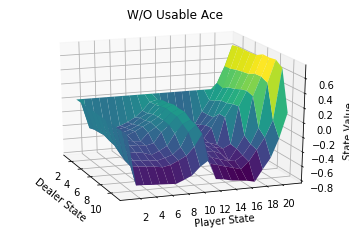

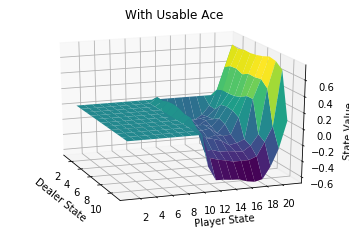

In [8]:
%matplotlib inline

fig = plt.figure()
x = np.arange(1, 12)
y = np.arange(1, 22)
X, Y = np.meshgrid(x, y)

Z = agent.value()[:, :, 0].T[X, Y]
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.view_init(20, -20)
ax.set_xticks(np.arange(2, 12, 2))
ax.set_yticks(np.arange(2, 22, 2))
ax.set_xlabel('Dealer State')
ax.set_ylabel('Player State')
ax.set_zlabel('State Value')
ax.set_title('W/O Usable Ace')
plt.show()

Z = agent.value()[:, :, 1].T[X, Y]
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.view_init(20, -20)
ax.set_xticks(np.arange(2, 12, 2))
ax.set_yticks(np.arange(2, 22, 2))
ax.set_xlabel('Dealer State')
ax.set_ylabel('Player State')
ax.set_zlabel('State Value')
ax.set_title('With Usable Ace')
plt.show()

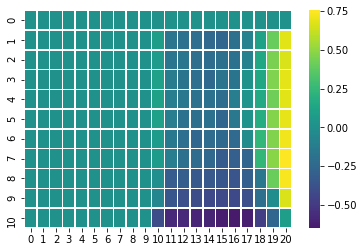

In [9]:
import seaborn as sns

sns.heatmap(Z.T, linewidths=.5, cmap='viridis', center=0)